In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

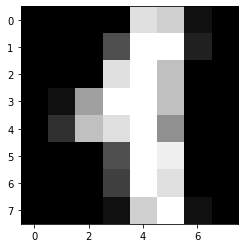

In [7]:
plt.imshow(digits.images[11], cmap = 'gray')

In [8]:
digits.target[11]

1

In [9]:
 from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(digits.data, digits.target)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
xtrain.shape

(1347, 64)

In [14]:
xtest.shape

(450, 64)

In [16]:
dt = DecisionTreeClassifier()

In [17]:
dt

DecisionTreeClassifier()

In [18]:
params = {'max_features': [50,60],
         'max_depth': [8,10,12]}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
gs = GridSearchCV(dt,param_grid = params, cv = 5, n_jobs = -1)

In [21]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [50, 60]})

In [22]:
gs.best_score_

0.8396530359355637

In [23]:
gs.best_params_

{'max_depth': 8, 'max_features': 50}

In [24]:
best_model = gs.best_estimator_

In [25]:
best_model.score(xtest,ytest)

0.8555555555555555

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [31]:
pipeline = make_pipeline(MinMaxScaler(), SelectKBest(k = 50, score_func=f_classif), DecisionTreeClassifier())

In [38]:
grid_params = {
    'selectkbest__k':[20,30,40],
    'decisiontreeclassifier__max_depth':[8,10,12]
}

In [39]:
gs = GridSearchCV(pipeline, grid_params,cv=5, n_jobs = -1)

In [40]:
gs.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 24 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('selectkbest', SelectKBest(k=50)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [8, 10, 12],
                         'selectkbest__k': [20, 30, 40]})

In [41]:
gs.best_params_

{'decisiontreeclassifier__max_depth': 10, 'selectkbest__k': 30}

In [42]:
gs.best_score_

0.8448464821699023